<a href="https://colab.research.google.com/github/evanzs/curso-python/blob/master/estatistica_descritiva_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [199]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io


In [200]:
from google.colab import files ## fazer upload de arquivos

In [201]:
## upload do meu pc
## upload = files.upload()

In [202]:
## lendo o arquivo
df_train = pd.read_csv(io.BytesIO(upload['train (1).csv']))
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [203]:
## Verificando a quantidade de  NAN que tem
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [204]:
## verifoca se os dados são nulos:

df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [205]:
df_train.shape

(891, 12)

In [206]:
## retira os valores nulos

df_filtred = df_train.fillna(df_train['Age'].dropna().median())
## Verificando a quantidade de  NAN que tem

print("NAN: \n",df_filtred.isna().sum())
print("\nNulos:\n",df_filtred.isnull().sum())

NAN: 
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Nulos:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [207]:
# verifica duplicados
df_filtred.duplicated().sum()

0

<Axes: >

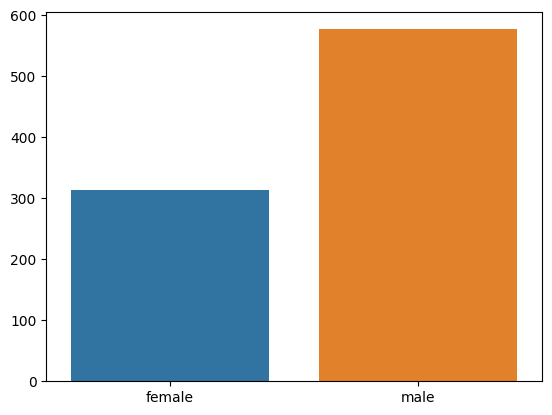

In [208]:
total_male = df_filtred[df_filtred['Sex'] == 'male']['Sex'].count()
total_female = df_filtred[df_filtred['Sex'] == 'female']['Sex'].count()
df_total = pd.DataFrame({"female":[total_female],"male":[total_male]})

sns.barplot(data=df_total)


<Axes: xlabel='Sex', ylabel='count'>

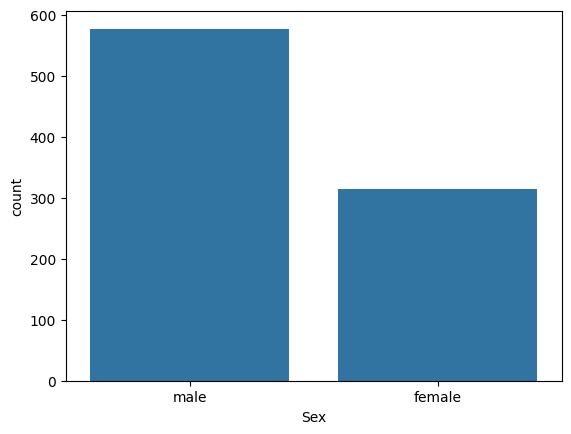

In [209]:
sns.countplot(data= df_filtred,x='Sex')

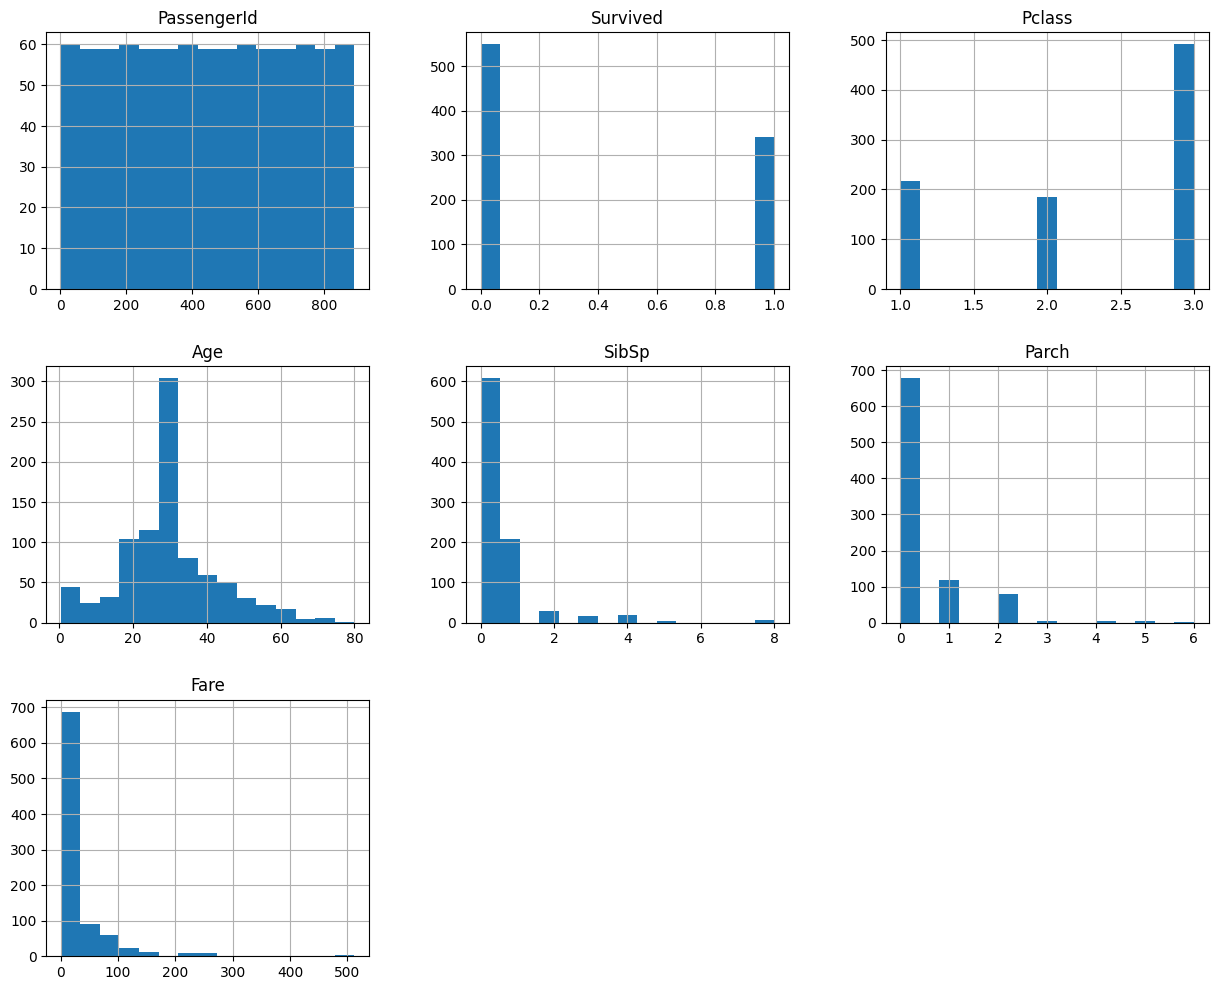

In [210]:
df_filtred.hist(figsize=(15,12),bins = 15)
plt.show()

<Axes: xlabel='Sex', ylabel='Survived'>

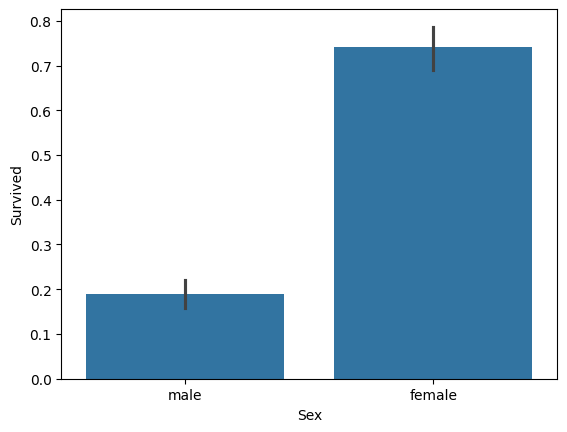

In [211]:
## relação entre sobreviventes e sexo

sns.barplot(data=df_filtred,y='Survived', x ='Sex')

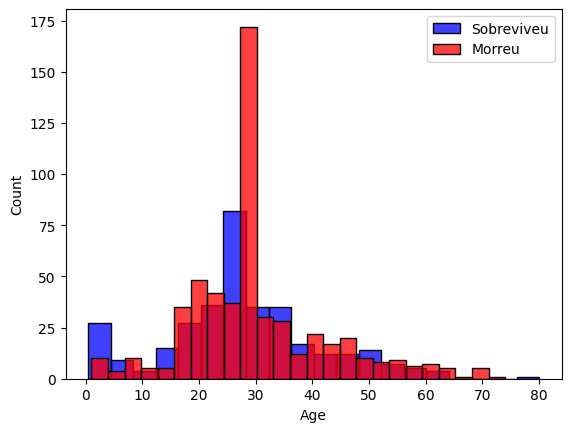

In [212]:
df_survived = df_filtred[df_filtred['Survived'] ==1 ]
sns.histplot(data=df_survived,x='Age',label="Sobreviveu", color='blue')
df_survived = df_filtred[df_filtred['Survived'] !=1 ]
sns.histplot(data=df_survived,x='Age',label="Morreu", color='red')
plt.legend()
plt.show()


In [213]:
## plotando matriz de correlação

corr = df_filtred.corr()
corr.style.background_gradient(cmap = 'coolwarm')

<ipython-input-213-b124e09606d0>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_filtred.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


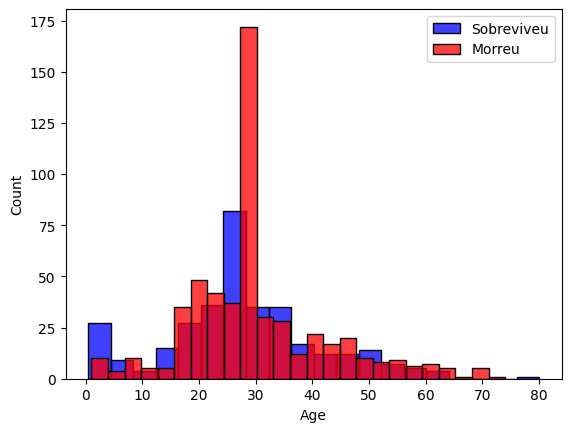

In [214]:
df_survived = df_filtred[df_filtred['Survived'] ==1 ]
sns.histplot(data=df_survived,x='Age',label="Sobreviveu", color='blue')
df_survived = df_filtred[df_filtred['Survived'] !=1 ]
sns.histplot(data=df_survived,x='Age',label="Morreu", color='red')
plt.legend()
plt.show()


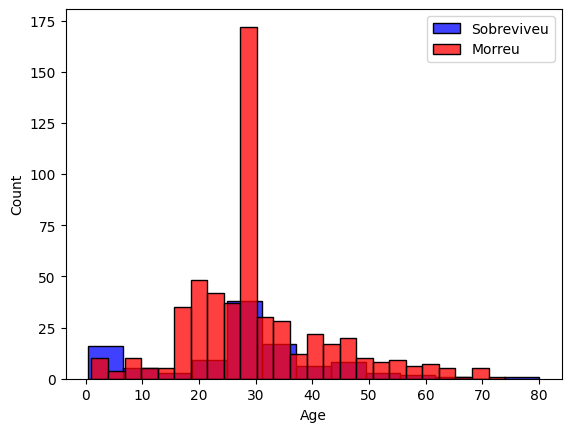

In [215]:
df_female = df_filtred[df_filtred['Sex'] !='female' ]

df_survived = df_female[df_female['Survived'] ==1 ]
sns.histplot(data=df_survived,x='Age',label="Sobreviveu", color='blue')
df_survived = df_filtred[df_filtred['Survived'] !=1 ]
sns.histplot(data=df_survived,x='Age',label="Morreu", color='red')
plt.legend()
plt.show()


In [216]:
df_filtred.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,28.0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,28.0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,28.0,S


In [217]:
 df_filtred.drop(['Name','Ticket','Embarked'],axis=1,inplace=True)

In [218]:
## transformando variaveis não nominais em numeros
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

encoder = preprocessing.LabelEncoder()


In [222]:
df = df_filtred.copy()
df['Cabin'] = df['Cabin'].apply(lambda x: str(x))

le = preprocessing.LabelEncoder()
for column in df.columns:
    if(df[column].dtypes=='object'):
        df[column] = le.fit_transform(df[column])

df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,82
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,56
4,5,0,3,1,35.0,0,0,8.0500,0


In [223]:
## plotando matriz de correlação

corr = df.corr()
corr.style.background_gradient(cmap = 'coolwarm')

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.034212,-0.057527,-0.001652,0.012658,-0.000637
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,0.276235
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,-0.537419
Sex,0.042939,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,-0.137704
Age,0.034212,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,0.164550
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,-0.024829
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,0.033585
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,0.310987
Cabin,-0.000637,0.276235,-0.537419,-0.137704,0.164550,-0.024829,0.033585,0.310987,1.000000


<Axes: >

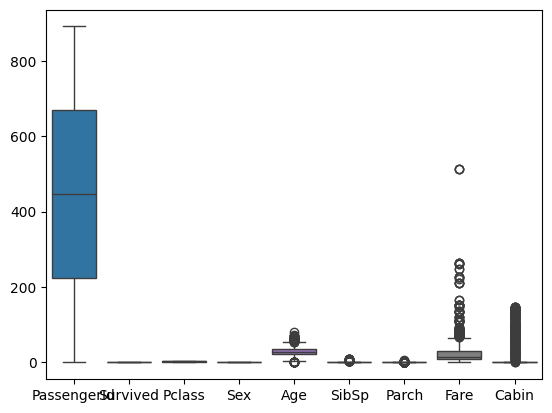

In [224]:
sns.boxplot(data = df)